In [2]:
import sys

sys.path.append('../../MembraneQuant')
from membranequant import *

%matplotlib notebook

In [3]:
res = pd.read_csv('res1.csv')
res_df = pd.read_csv('res1_df.csv')

In [4]:
res_df

,Unnamed: 0,ID,Line,Condition,Path,Cyt,Mem_tot,Mem_ant,Mem_post,Dosage_af,Dosage_sub,Genotype
0,0,0,nwg201,11121830par2rnai,/Users/blandt/Desktop/Rundowns/PAR-2 RUNDOWN/E...,402.151050,290.747591,291.240949,396.495741,431.417793,266.590571,"Wild type, par-3 -/-"
1,1,1,nwg201,11121830par2rnai,/Users/blandt/Desktop/Rundowns/PAR-2 RUNDOWN/E...,1111.974910,1560.643746,1337.660743,2234.745653,1369.225169,1885.170369,"Wild type, par-3 -/-"
2,2,2,nwg201,11121830par2rnai,/Users/blandt/Desktop/Rundowns/PAR-2 RUNDOWN/E...,484.472525,195.794663,125.181216,329.252820,477.018692,617.004962,"Wild type, par-3 -/-"
3,3,3,nwg201,11121830par2rnai,/Users/blandt/Desktop/Rundowns/PAR-2 RUNDOWN/E...,515.708473,159.160387,122.240361,229.052218,472.357707,27.534898,"Wild type, par-3 -/-"
4,4,4,nwg201,11121830par2rnai,/Users/blandt/Desktop/Rundowns/PAR-2 RUNDOWN/E...,596.970883,349.532004,180.856700,509.717482,608.173290,643.590486,"Wild type, par-3 -/-"
...,...,...,...,...,...,...,...,...,...,...,...,...
111,111,111,nwg338,"tom4,15,60",/Users/blandt/Desktop/RING lines/Experiment/21...,5694.414650,3188.366091,733.801092,8838.841382,5873.060858,7140.082831,L109R
112,112,112,nwg338,"tom4,15,60",/Users/blandt/Desktop/RING lines/Experiment/21...,5553.912026,4115.586103,358.674031,9755.349996,6013.130394,7721.708613,L109R
113,113,113,nwg338,"tom4,15,60",/Users/blandt/Desktop/RING lines/Experiment/21...,5028.541991,3356.231875,345.999939,9242.960087,5411.068380,6915.913835,L109R
114,114,114,nwg338,"tom4,15,60",/Users/blandt/Desktop/RING lines/Experiment/21...,5302.473252,4124.633850,209.499035,10480.727921,5693.633993,7314.393926,L109R


In [5]:
mems = res.groupby('Frame').apply(lambda x: x['Membrane signal'].to_numpy())
cyts = res.groupby('Frame').apply(lambda x: x['Cytoplasmic signal'].to_numpy())

### Wild type

In [6]:
def func(line, ax, c, label):
    x = [l == line and c == 'wt' for l, c in zip(res_df.Line, res_df.Condition)]
    m = mems[x].to_numpy() / cyts[x].to_numpy()
    mems_mean = np.mean(m, axis=0)
    mems_std = np.std(m, axis=0)
    ax.plot(mems_mean, c=c, label=label)
#     for i in m:
#         ax.plot(i, c=c)
    ax.fill_between(np.arange(len(mems_mean)), mems_mean - mems_std, mems_mean + mems_std, alpha=0.2, color=c)

<IPython.core.display.Javascript object>


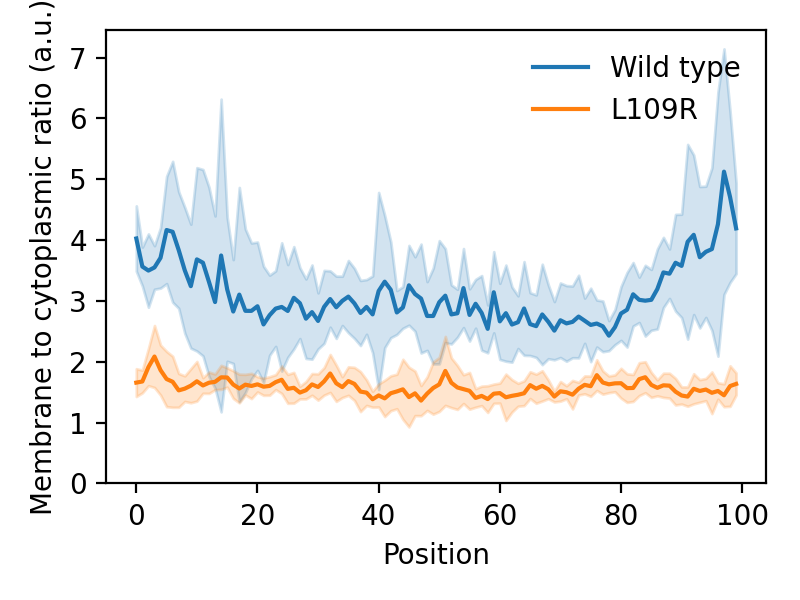

In [7]:
fig, ax = plt.subplots()
func('nwg201', ax, 'tab:blue', 'Wild type')
func('nwg369', ax, 'tab:orange', 'L109R')
ax.set_ylim(bottom=0)
ax.set_xlabel('Position')
ax.set_ylabel('Membrane to cytoplasmic ratio (a.u.)')
ax.legend(frameon=False)
fig.set_size_inches(4, 3)
fig.tight_layout()

In [8]:
def func(line, ax, c, label):
    x = [l == line and c == 'wt' for l, c in zip(res_df.Line, res_df.Condition)]
    m = mems[x].to_numpy() #/ cyts[x].to_numpy()
    mems_mean = np.mean(m, axis=0)
    mems_std = np.std(m, axis=0)
    ax.plot(mems_mean, c=c, label=label)
#     for i in m:
#         ax.plot(i, c=c)
    ax.fill_between(np.arange(len(mems_mean)), mems_mean - mems_std, mems_mean + mems_std, alpha=0.2, color=c)

<IPython.core.display.Javascript object>


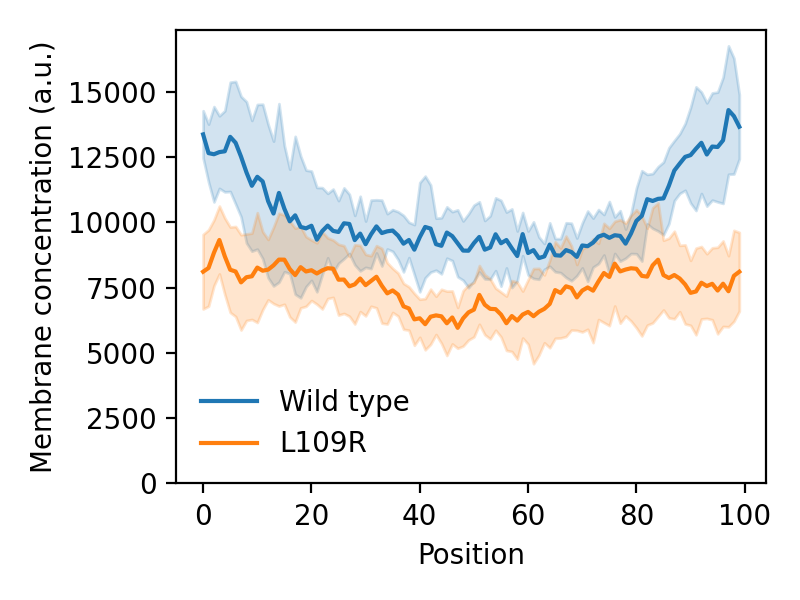

In [9]:
fig, ax = plt.subplots()
func('nwg201', ax, 'tab:blue', 'Wild type')
func('nwg369', ax, 'tab:orange', 'L109R')
ax.set_ylim(bottom=0)
ax.set_xlabel('Position')
ax.set_ylabel('Membrane concentration (a.u.)')
ax.legend(frameon=False)
fig.set_size_inches(4, 3)
fig.tight_layout()

### Full rundown

In [10]:
def func(line, ax, c, label):
    x = [l == line for l, c in zip(res_df.Line, res_df.Condition)]
    m = mems[x].to_numpy() #/ cyts[x].to_numpy()
    mems_mean = np.mean(m, axis=0)
    mems_std = np.std(m, axis=0)
#     ax.plot(mems_mean, c=c, label=label)
    for i in m:
        ax.plot(i, c=c)
#     ax.fill_between(np.arange(len(mems_mean)), mems_mean - mems_std, mems_mean + mems_std, alpha=0.2, color=c)

In [15]:
# fig, ax = plt.subplots()
# func('nwg201', ax, 'tab:blue', 'Wild type')
# func('nwg369', ax, 'tab:orange', 'L109R')
# ax.set_ylim(bottom=0)
# ax.set_xlabel('Position')
# ax.set_ylabel('Membrane to cytoplasmic ratio')
# # ax.legend(frameon=False)
# fig.set_size_inches(4, 3)
# fig.tight_layout()

### ASI

In [12]:
def func(line, ax, col, label):
    x = [l == line for l, c in zip(res_df.Line, res_df.Condition)]
    m = mems[x].to_numpy() 
    c = cyts[x].to_numpy()
    d = res_df.Dosage_af[x].to_numpy()
    for i, _m in enumerate(m):
        a = - asi(_m)
        ax.scatter(d[i], a, c=col)

In [14]:
# fig, ax = plt.subplots()
# func('nwg201', ax, 'tab:blue', 'Wild type')
# func('nwg369', ax, 'tab:orange', 'L109R')
# # ax.set_ylim(bottom=0)
# # ax.set_xlabel('Position')
# # ax.set_ylabel('Membrane to cytoplasmic ratio')
# # ax.legend(frameon=False)
# fig.set_size_inches(4, 3)
# fig.tight_layout()

### PH

In [21]:
def func(line, ax, c, label):
    x = [l == line for l in res_df.Line]
    m = mems[x].to_numpy() / cyts[x].to_numpy()
    mems_mean = np.mean(m, axis=0)
    mems_std = np.std(m, axis=0)
    ax.plot(mems_mean, c=c, label=label)
#     for i in m:
#         ax.plot(i, c=c)
    ax.fill_between(np.arange(len(mems_mean)), mems_mean - mems_std, mems_mean + mems_std, alpha=0.2, color=c)

<IPython.core.display.Javascript object>


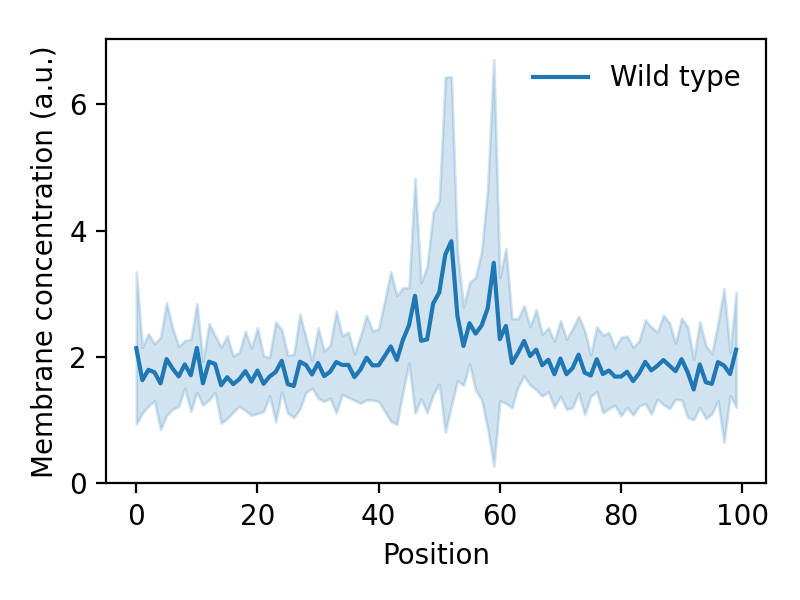

In [22]:
fig, ax = plt.subplots()
func('od58', ax, 'tab:blue', 'Wild type')
ax.set_ylim(bottom=0)
ax.set_xlabel('Position')
ax.set_ylabel('Membrane concentration (a.u.)')
ax.legend(frameon=False)
fig.set_size_inches(4, 3)
fig.tight_layout()